# Andromeda Galaxy Image Lab

In this lab, we will be creating a three-color (or RGB) image of the Andromeda galaxy.  The lab is separated into three sections.  In the first section, we will familiarize ourselves with the code and produce an initial image.  In the second section, we will be editing the image's color as well as examining how the color is applied.  In the third section, we will make a final image of the galaxy (including any edits made), which will then be printed off to take home.  

--------

### Some basic Python jargon:

**function** → a piece of code written to carry out a specific task in the program.  For example:  print(‘Hello world’) is a function that will print out the words “Hello world” when you run the program.  

**module** → libraries of functions, which you import into Python in order to use.

**comment** → a line of code with a ‘#’ in front.  This line will be skipped by the program and not run as part of the code.  Comments are good for commentary on various sections of the code (hence the name), as well as to temporarily prevent a section of the code from running.

**string** → a section of code inside quotations:  “Hello world” and ‘Hello world’ are both strings.  Usually used for filenames, as well as certain variables and parameters.  

--------

### How to run a Jupyter Notebook:

Press:  **Shift+Enter** to run an individual box (section of code) in the Notebook.

In the upper left next to each box, you’ll notice an “In [ ]:”.  If the brackets are empty, that means that this particular box has not been run.  If they contain a number, then the number indicates the order in which you ran the box (for example:  [3] means that this was the third box you ran).  If they contain a star [\*], then the box is currently running.  

-----


## Section 1:  Making an RGB Image in Python

We'll start this lab by importing some modules:

In [1]:
# Import needed modules:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from astropy.io import fits
from matplotlib import pyplot as pl
import aplpy


# Show images in notebook instead of separate window:
% matplotlib inline

Alright, now we can begin working with the actual data to create an RGB image.  The following is an outline of what we'll be doing in the first section of the lab.

**How to make an RGB image of Andromeda with three filters:**

1.  Use the "data cube", created from the three fits files, to make a three-color or RGB image of Andromeda.

2.  View and edit the final image.

------------


We’ll start from the top:

**1\. Use the "data cube", created from the three fits files, to make a three-color or RGB image of Andromeda.
**

The data cube combines all of the data from the three filters into a single file, and allows us to work with and manipulate all three filters simultaneously.  If you’re familiar with image processing software (like Photoshop or Gimp Editor), this is very similar to creating a three-layer image.  

We will being with making the RGB image.  The make_rgb_image() function assigns each filter to a color—red, green, or blue.  Each color is then scaled according to the pixel values for that filter.  In the next section of this lab, we will be changing these values, but for now the defaults are fine. 




In [2]:
# Use the data cube to create an rgb image of Andromeda.  
aplpy.make_rgb_image('M31_reduced_data_cube.fits','M31_rgb_reduced_image.png')

print()
print('Done')

INFO: Red: [aplpy.rgb]
INFO: vmin =  2.487e+03 (auto) [aplpy.rgb]
INFO: vmax =  2.412e+04 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  4.343e+03 (auto) [aplpy.rgb]
INFO: vmax =  2.397e+04 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  6.155e+03 (auto) [aplpy.rgb]
INFO: vmax =  2.699e+04 (auto) [aplpy.rgb]

Done


-----

**2\.  View and edit the final image.**

We will edit the final image in Section 3 of the lab.  For now, leave as is.

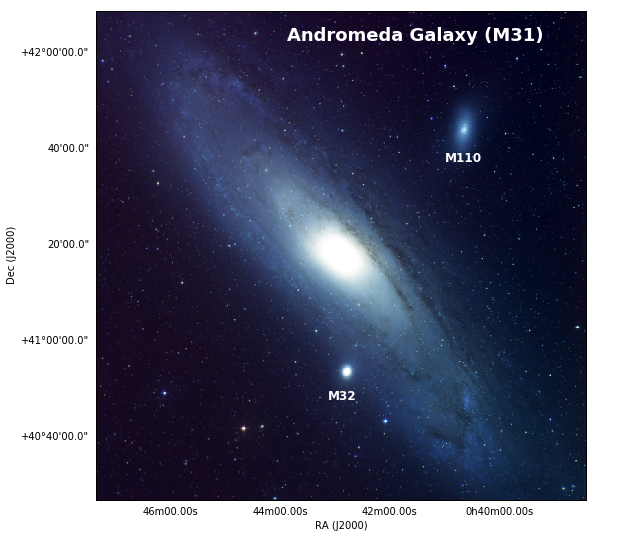

In [3]:
# Show the image you created above:
fig = aplpy.FITSFigure('M31_reduced_data_cube_2d.fits')
fig.recenter(10.6833,41.2692,radius=0.85)
#fig.axis_labels.hide()
#fig.tick_labels.hide()
fig.add_label(10.3, 42.02, 'Andromeda Galaxy (M31)', color='white', weight='bold', size=18) #Andromeda label
fig.add_label(10.7, 40.78, 'M32', color='white', weight='bold', size=12) #M32 label
fig.add_label(10.1, 41.59, 'M110', color='white', weight='bold', size=12) #M110 label

fig.show_rgb('M31_rgb_reduced_image.png')

**Caption:**  The Andromeda galaxy, labeled with the RA and Dec coordinates.  There are two easily visible satellite galaxies in this image:  M32 is below the galactic center, and M110 is in the upper right of the image.

-------------------

## Section 2:  Editing the Image

Now we will be working on editing how the function 'make_rgb_image()' maps a color to a filter.  Remember, the filters are identical images of Andromeda taken at different wavelengths of light.  Viewed without a color filter, they will be in black and white.  To make a color image of Andromeda, we map each filter (wavelength) to a color—blue, green, or red.  We then define how vivid to make that color, as well as how to define the color gradient for each filter.

In this section, we will be modifying how intense or vivid the blue-green-red colors are, as well as changing the how the color gradient is mapped to the filter.  The intensity of the color is defined by the 'vmin' and 'vmax' parameters, which take a number input as shown below.  The gradient mapping function is called the 'stretch', and the input is the type of math function.

-----
### Image editing options:

**vmin range:**  0.0 ↔ 9.9e+09    
**vmax range:**  0.0 ↔ 9.9e+09

*Make sure that the vmax for a color is larger than the vmin for that color!*

**Stretch function (string input):**  ‘linear’, ‘log’, ‘arcsinh’, ‘sqrt’, ‘power’ 

**The defaults:**  In order to return the image to its original state, use the following numbers:

vmin_r = 2.487e+03, vmin_g = 4.343e+03, vmin_b = 6.155e+03,   
vmax_r = 2.412e+04, vmax_g = 2.397e+04, vmax_b = 2.699e+04,    
stretch_r = 'linear', stretch_g = 'linear', stretch_b = 'linear'

-----
### Where to start:

Start by modifying one color or stretch option at a time (for example, just change the vmin_r value, or just change the type of stretch function for a single color).  Run the box and examine the image to see how it changed.  Remember, you can always return to the default values (which are listed above).

Some exercises:
* How does changing the stretch functing for an individual color affect the image?
* Is there a visible effect from changing one of the vmax exponents from +04 to +09?
* What do you need to do to make the galaxy "vanish"? *hint: oversaturate the image*

There are also some examples of parameters listed at the end of this section.

When you're done experimenting, pick the color and stretch combination which you like the best.  We'll be using these in the next section to make a full-resolution image of Andromeda for you to take home! 

INFO: Red: [aplpy.rgb]
INFO: vmin =  2.487e+03 [aplpy.rgb]
INFO: vmax =  2.412e+04 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  4.343e+03 [aplpy.rgb]
INFO: vmax =  2.397e+04 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  6.155e+03 [aplpy.rgb]
INFO: vmax =  2.699e+04 [aplpy.rgb]

creating image...


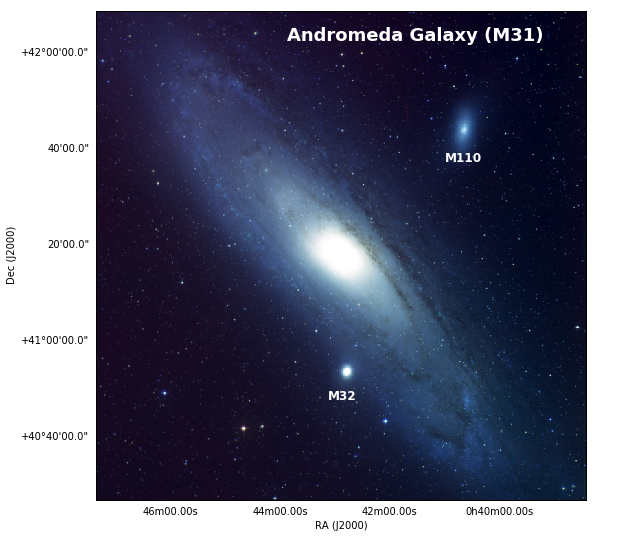

In [4]:
# Below is the make_rgb_image() function to modify.  Make sure to only change the number
# or string input for the vmin, vmax, and stretch parameters.

aplpy.make_rgb_image('M31_reduced_data_cube.fits','M31_rgb_edited.png',
                     vmin_r = 2.487e+03, vmin_g = 4.343e+03, vmin_b = 6.155e+03,
                     vmax_r = 2.412e+04, vmax_g = 2.397e+04, vmax_b = 2.699e+04,
                     stretch_r = 'linear', stretch_g = 'linear', stretch_b = 'linear')

print()
print('creating image...')

fig = aplpy.FITSFigure('M31_reduced_data_cube_2d.fits')
fig.recenter(10.6833,41.2692,radius=0.85)
#fig.axis_labels.hide()
#fig.tick_labels.hide()
fig.add_label(10.3, 42.02, 'Andromeda Galaxy (M31)', color='white', weight='bold', size=18) #Andromeda label
fig.add_label(10.7, 40.78, 'M32', color='white', weight='bold', size=12) #M32 label
fig.add_label(10.1, 41.59, 'M110', color='white', weight='bold', size=12) #M110 label

fig.show_rgb('M31_rgb_edited.png')

---

**Some fun examples to try:**

vmin_r = 9.9e+08, vmin_g = 0.0, vmin_b = 4.072e+03,   
vmax_r = 2.471e+09, vmax_g = 2.554e+04, vmax_b = 2.891e+04,    
stretch_r = 'power', stretch_g = 'linear', stretch_b = 'linear'

...

vmin_r = 0.0, vmin_g = 0.0, vmin_b = 0.0,    
vmax_r = 2.471e+09, vmax_g = 2.554e+04, vmax_b = 2.891e+04,    
stretch_r = 'linear', stretch_g = 'linear', stretch_b = 'linear'

...

vmin_r = 0.0, vmin_g = 2.0e+04, vmin_b = 0.0,    
vmax_r = 2.471e+09, vmax_g = 2.554e+04, vmax_b = 2.891e+04,    
stretch_r = 'linear', stretch_g = 'power', stretch_b = 'linear'

...

vmin_r = 2.487e+03, vmin_g = 4.343e+03, vmin_b = 6.155e+03,    
vmax_r = 2.412e+04, vmax_g = 2.397e+04, vmax_b = 2.699e+04,    
stretch_r = 'linear', stretch_g = 'power', stretch_b = 'linear'

---

## Section 3:  Create a Final Image

It's time to make a final image of the Andromeda galaxy, with the edits you made above.  The box below contains the now familiar ‘make_rgb_image()’ command, set up with the default values.

1\. Change the values for the vmin, vmax, and stretch to the values you chose in the previous section.  

2\. Run the box. 


In [5]:
aplpy.make_rgb_image('M31_reduced_data_cube.fits','M31_rgb_final_image.png', 
                     vmin_r = 2.487e+03, vmin_g = 4.343e+03, vmin_b = 6.155e+03,
                     vmax_r = 2.412e+04, vmax_g = 2.397e+04, vmax_b = 2.699e+04,
                     stretch_r = 'linear', stretch_g = 'linear', stretch_b = 'linear')


print()
print('Done')

INFO: Red: [aplpy.rgb]
INFO: vmin =  2.487e+03 [aplpy.rgb]
INFO: vmax =  2.412e+04 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  4.343e+03 [aplpy.rgb]
INFO: vmax =  2.397e+04 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  6.155e+03 [aplpy.rgb]
INFO: vmax =  2.699e+04 [aplpy.rgb]

Done


--------------------------------------------------------
### Final image editing:  

There are a number of options here to customize your image.  Most importantly:  

1\. Find the first function 'fig.add_label()' and change the string 'Name' to your own name.  

2\. Run the box.  

Check that the final, full-resolution image looks the way you want.  Check that your name appears in the bottom left of the image and shows up clearly against the background.  

3\.  Labels and customization:

Now you can choose how many of the labels you want on your image, as well as if you want to include the coordinate tick marks and axes.  

* If you want everything on the image, leave the code as is.  
* If you would like to remove the coordinates and axes, uncomment the two functions 'fig.axis_labels.hide()' and 'fig.tick_labels.hide()'
* If you would like to remove the labels for "Andromeda", "M110", and "M32", comment out the functions 'fig.add_label()' for whichever labels you do not want.  REMEMBER, your name MUST be included on the final image, so do not comment out that line!

*Note: 'uncommenting' a line of code means removing the hashtag from in front of that line.  'commenting' or 'comment out' a line of code means adding a hashtag in front of that line.*

4\. Run the box again.  Make sure that the final image is exactly the way you want it to look. 

5\. Find the function 'fig.save()' at the end of the code.  Find the string 'name_M31_rgb_final.png' and change 'name' to your first name.  Make sure that there are no spaces in the filename!  Uncomment the function.  Run the box one last time.

And you're done!

--------------------------------------------------------


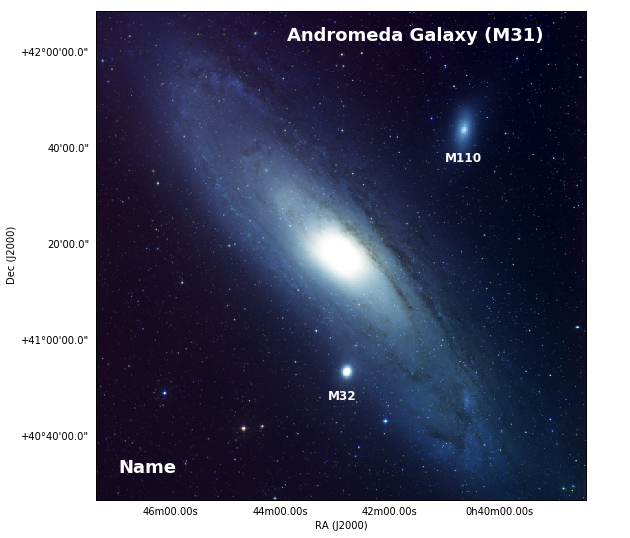

In [11]:
fig = aplpy.FITSFigure('M31_reduced_data_cube_2d.fits')
fig.recenter(10.6833,41.2692,radius=0.85)
#fig.axis_labels.hide()
#fig.tick_labels.hide()

fig.add_label(11.6, 40.55, 'Name', color='white', weight='bold', size=18) #Name label

fig.add_label(10.3, 42.02, 'Andromeda Galaxy (M31)', color='white', weight='bold', size=18) #Andromeda label
fig.add_label(10.7, 40.78, 'M32', color='white', weight='bold', size=12) #M32 label
fig.add_label(10.1, 41.59, 'M110', color='white', weight='bold', size=12) #M110 label


fig.show_rgb('M31_rgb_final_image.png')
#fig.save('name_M31_rgb_final.png')